In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("suv_data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Exploratory Data Analysis

In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

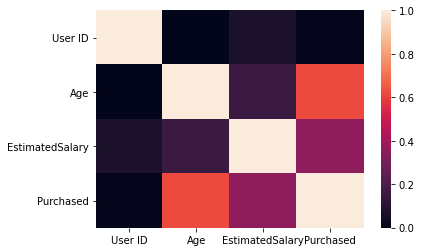

In [4]:
sns.heatmap(df.corr());

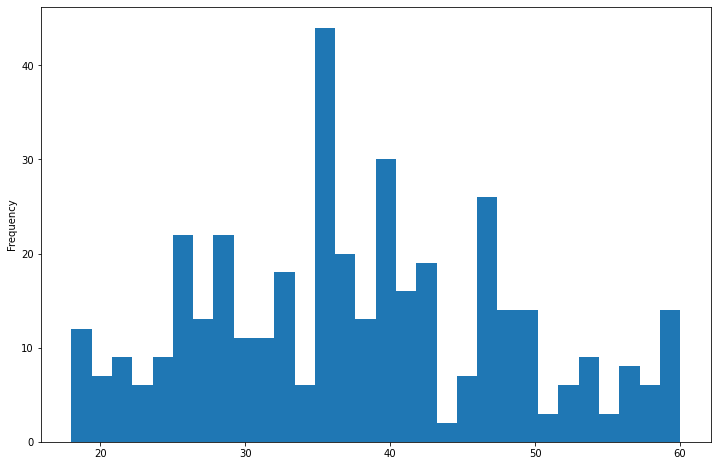

In [5]:
df.Age.plot(kind='hist', bins=30, figsize=(12, 8));

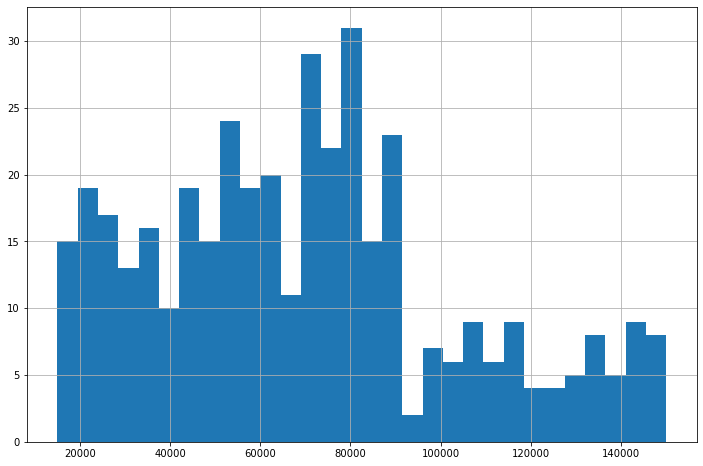

In [6]:
df.EstimatedSalary.hist(bins=30, figsize=(12,8));

C:\Users\welcome\AppData\Local\conda\conda\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


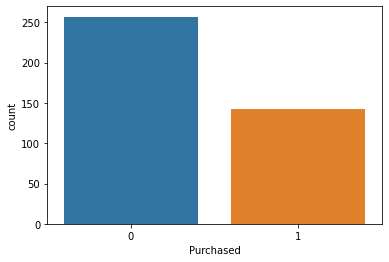

In [7]:
sns.countplot('Purchased', data=df);

C:\Users\welcome\AppData\Local\conda\conda\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


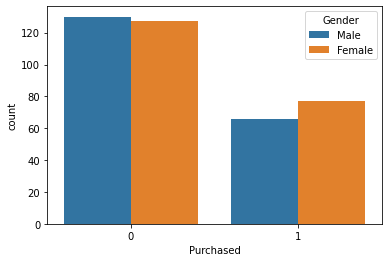

In [8]:
sns.countplot('Purchased', hue='Gender', data=df);

In [9]:
## converting categorical value
gender=pd.get_dummies(df['Gender'], drop_first=True)

In [10]:
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [11]:
df.drop(['User ID', 'Gender'], axis=1, inplace=True)

In [12]:
df=pd.concat([gender, df], axis=1)

In [13]:
df.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [14]:
X=df.drop('Purchased', axis=1)
X.head()

,Male,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [15]:
y=df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
## Splitting Data for training and testing
X_train, X_test ,y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Logistic Regression Model Creation 

In [20]:
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression()
logic.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred=logic.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
acc=accuracy_score(y_test, y_pred)
acc

0.8916666666666667

In [24]:
print(confusion_matrix(y_test, y_pred))

[[74  5]
 [ 8 33]]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120

